In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import wrangle

# Acquire

In [2]:
df = pd.read_csv('allservicecalls.csv')

In [3]:
df.shape

(495440, 17)

# Prepare

In [4]:
df = wrangle.clean_311(df)
df.head()

,case_id,open_date,due_date,closed_date,is_late,dept,call_reason,case_type,case_status,source_id,address,council_district,longitude,latitude,days_open,resolution_days_due,days_before_or_after_due,level_of_delay,zipcode
2497,1014281655,2018-02-28,2018-07-09,2020-06-06,YES,Code Enforcement Services,code,Certificates of Occupancy,Closed,Internal Services Requests,"5550 EASTERLING, San Antonio, 78251",6,2067118.0,13723868.0,829.0,131,-698.0,Extremely Late Response,78251
2498,1014281665,2018-02-28,2018-07-09,2020-06-06,YES,Code Enforcement Services,code,Zoning: District Requirement,Closed,Internal Services Requests,"5550 EASTERLING, San Antonio, 78251",6,2067118.0,13723868.0,829.0,131,-698.0,Extremely Late Response,78251
2499,1014281677,2018-02-28,2018-07-09,2020-06-06,YES,Code Enforcement Services,code,Certificates of Occupancy,Closed,Internal Services Requests,"5550 EASTERLING, San Antonio, 78251",6,2067118.0,13723868.0,829.0,131,-698.0,Extremely Late Response,78251
2556,1014300321,2018-03-06,2020-09-24,2020-05-18,NO,Development Services,buildings,Street Light Existing Res Sub Div,Closed,Constituent Call,"1018 KING AVE, San Antonio, 78211",4,2108015.0,13680344.0,804.0,933,129.0,Very Early Response,78211
2657,1014326068,2018-03-14,2018-07-23,2020-05-27,YES,Code Enforcement Services,code,Zoning: District Requirement,Closed,Internal Services Requests,"11800 FISCHER RD, San Antonio, 78073",4,2091672.0,13658660.0,805.0,131,-674.0,Extremely Late Response,78073


In [13]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test, train_scaled, validate_scaled, test_scaled = wrangle.split_separate_scale(df, stratify_by= None)
train.head()

NameError: name 'split' is not defined

# Plan Out Explore

## Questions we want to answer

1. Is there a link to which form of reporting is responded to quickest and slowest?
2. Is the average number of calls in an area affect the response time?
3. Does the type of call in an area effect the level of delay? (Loose dog on the south side vs loose dog on the north side)
4. Does the specific location effect the delay time?
5. Does category/department affect response time?
6. Is response time for issue X different between geographical location Y when compared to the average response time? (or other geographical location?)
7. late_status and open_days by: zip code, department, source_id (Do different areas get better general service? Do different areas get better service depending on the department/issue?)Average resolution days due by: department, reason_type (Are different departments/issues expected to take longer?)
8. Average resolution days due by: department, reason_type (Are different departments/issues expected to take longer?)
9. Is there a difference in response time between districts?
10. What months or quarters of the year have the higherst volumn of calls? Does this impact how fast they respond?

### Lori's Questions
1. Is there a link to which form of reporting is responded to quickest and slowest?
3. Does the type of call in an area effect the level of delay? (Loose dog on the south side vs loose dog on the north side)

### Gabby's Questions
5. Does category/department affect response time?
6. Is response time for issue X different between geographical location Y when compared to the average response time? (or other geographical location?)

### Sam's Questions
7. late_status and open_days by: zip code, department, source_id (Do different areas get better general service? Do different areas get better service depending on the department/issue?)Average resolution days due by: department, reason_type (Are different departments/issues expected to take longer?)
8. Average resolution days due by: department, reason_type (Are different departments/issues expected to take longer?)

### John's Questions
9. Is there a difference in response time between districts?
10. What months or quarters of the year have the higherst volumn of calls? Does this impact how fast they respond?

### Caitlyn's Questions
2. Is the average number of calls in an area affect the response time?
4. Does the specific location effect the delay time?

___

# Start Exploring

___

## Is the average number of calls in an area affect the response time?

### Game plan
- Use the following features in this exploratory analysis
    - zip code
    - council district
    - days_open
    - resolution_days_due
    - days_before_or_after_due
    - level_of_delay
- Look at the Univariate of each
    - Jot down thoughts, questions, and take aways
- Create bivariate plots seeing how each one plays into one anohter
- Create multivariate  plots

___

## Univariate

#### Zipcode

___

#### Council District

<AxesSubplot:>

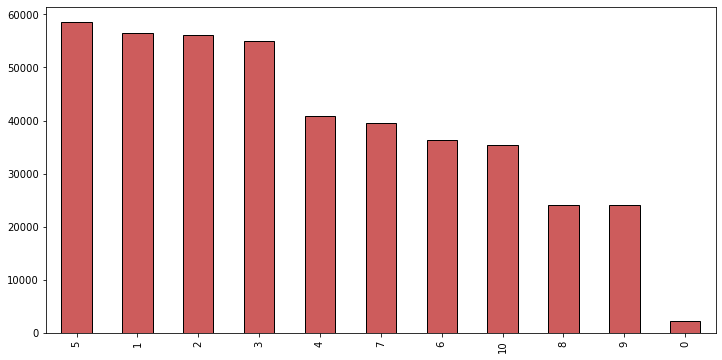

In [5]:
plt.figure(figsize=(12,6))
df['council_district'].value_counts().plot.bar(color='indianred', edgecolor='black')

### Takwaways:
- Districts 1, 2, 3, & 5 have higher reports
- District 0 has nearly no reports in comparison to the others
- 4, 6, 7, 8, 9, & 10 still have many reports but not as much as 1, 2, 3, and 5

___

#### Days Open

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


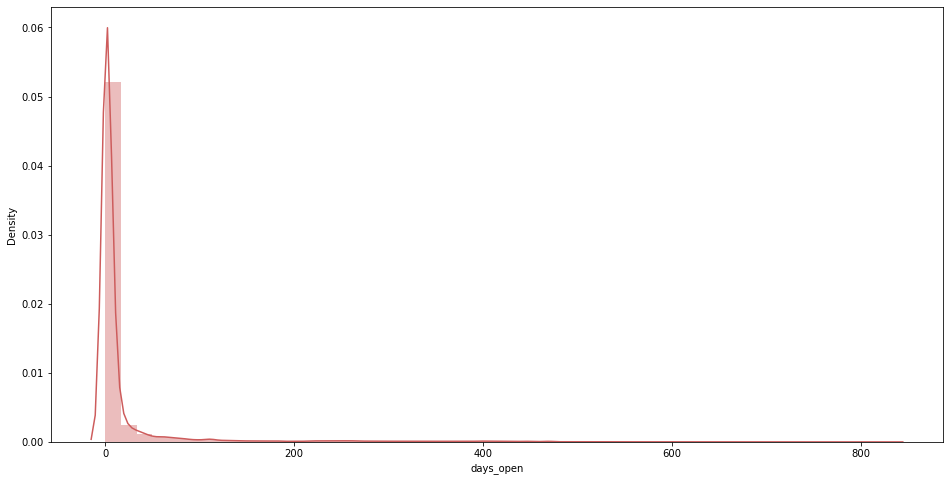

In [6]:
plt.figure(figsize=(16,8))
sns.distplot(df.days_open, color='indianred')
plt.show()

### Takeaways:
- definatly skewed right
- was worse before removing outliers over 1400 days
- not willing to remove any more for the ingrity of the data frame

___

#### Days Until Resolution is Due

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


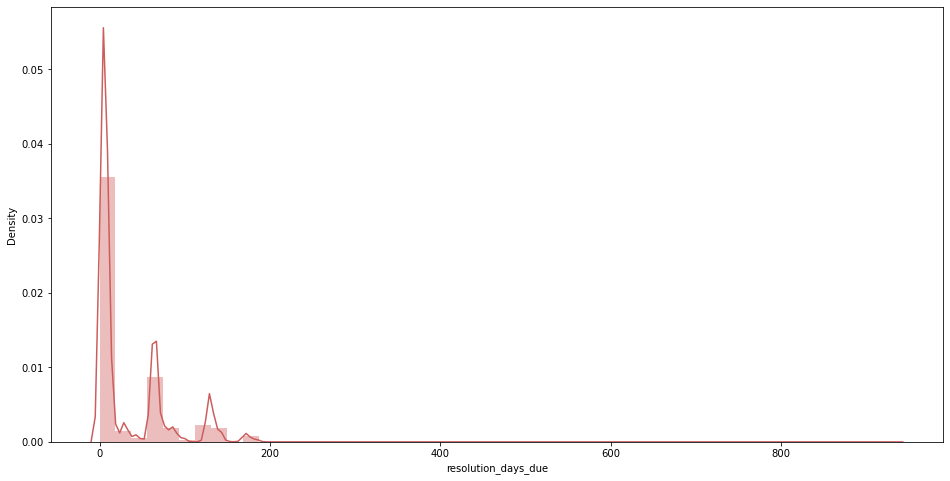

In [7]:
plt.figure(figsize=(16,8))
sns.distplot(df.resolution_days_due, color='indianred')
plt.show()

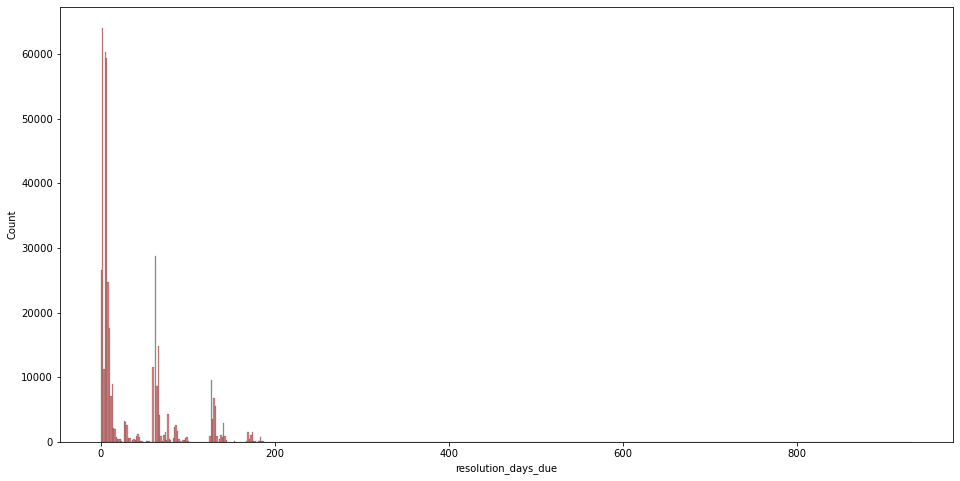

In [8]:
plt.figure(figsize=(16,8))
sns.histplot(df.resolution_days_due, color='indianred')
plt.show()

### Takeaways:
- Skewed right
- Can see a few different spikes but cant see where these are
    - all spikes are between 0 and 200 days open

___

#### Days Before or After Due Date the Resolution was Made

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


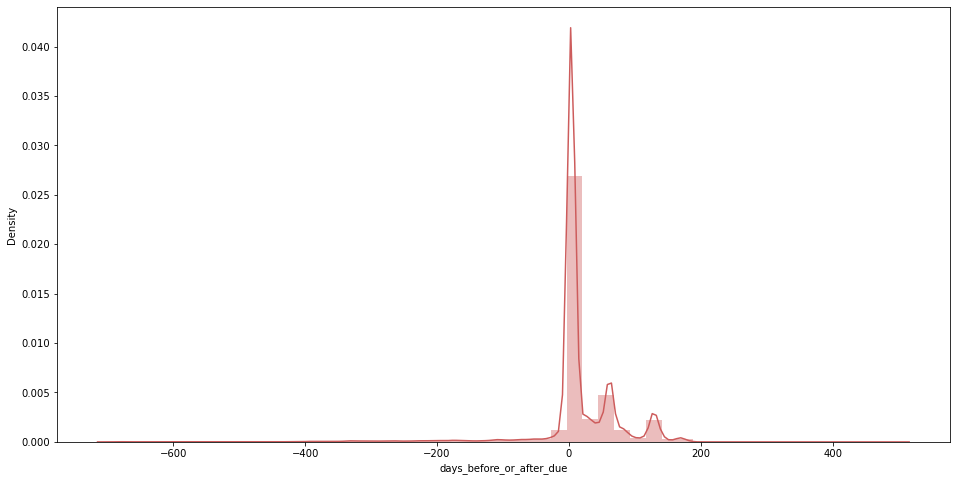

In [9]:
plt.figure(figsize=(16,8))
sns.distplot(df.days_before_or_after_due, color='indianred')
plt.show()

### Takeaways:
- There are more spikes in the casescompleted before due
- The later after the due date the more it trails off

___

## Bivariate

#### Council District and Days Open

<AxesSubplot:xlabel='council_district', ylabel='days_open'>

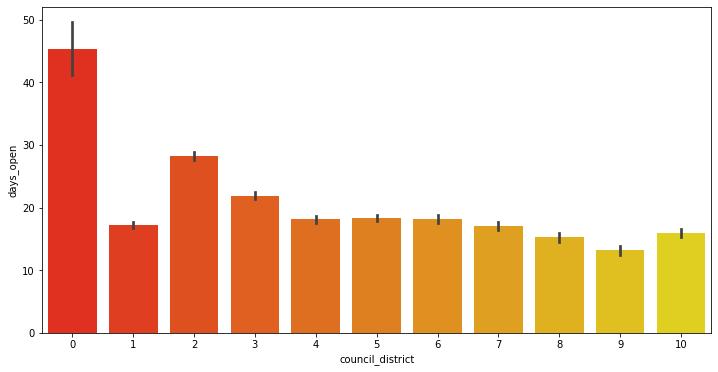

In [16]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x=df.council_district, y=df.days_open, palette='autumn')

<AxesSubplot:xlabel='council_district', ylabel='days_open'>

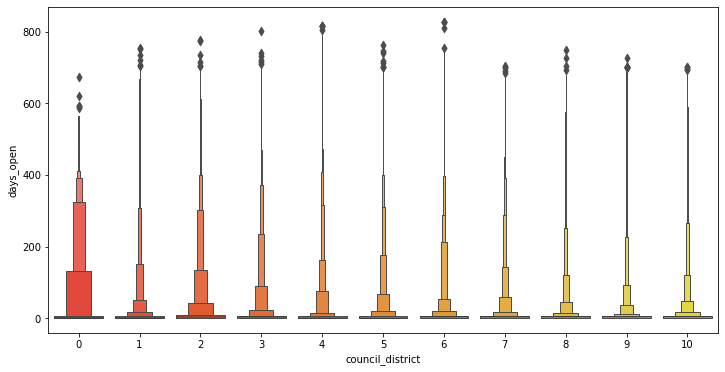

In [17]:
plt.figure(figsize=(12,6))
sns.boxenplot(data=df, x=df.council_district, y=df.days_open, palette='autumn')

<AxesSubplot:xlabel='council_district', ylabel='days_open'>

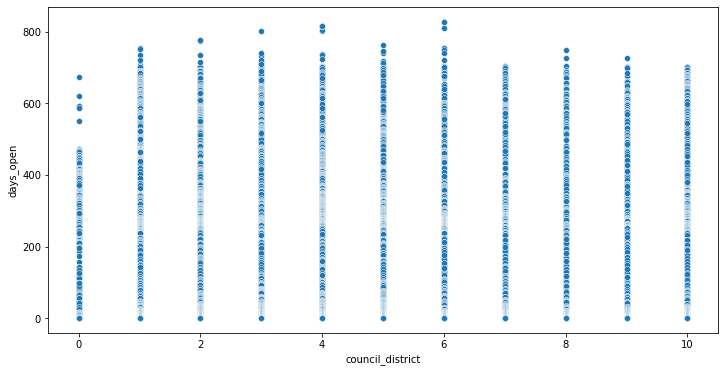

In [20]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x=df.council_district, y=df.days_open, palette='autumn')

    - zip code
    - council district
    - days_open
    - resolution_days_due
    - days_before_or_after_due
    - level_of_delay